In [193]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [194]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2_00.csv'
df2 = pd.read_csv(url)

In [195]:
df2.shape

(19140, 16)

In [196]:
df2.isnull().sum(axis = 0)

track_name              0
track_id                0
track_artist            0
playlist_id             0
track_popularity        0
loudness                0
instrumentalness        0
key                     0
speechiness             0
acousticness            0
danceability            0
liveness                0
tempo                   0
energy                  0
valence                 0
emotion             16650
dtype: int64

In [197]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [198]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [199]:
df4 = df4.dropna()
df4.shape

(2490, 16)

In [200]:
df4['playlist_id'].value_counts()

sub                       686
3ykXidKLz1eYPvuGoFlD1e     17
37i9dQZF1DWUFmyho2wkQU     15
4NlAd9NpIa92IjErMyAriM     13
44bkJI1QGkT2O0GYJSsbkp     12
                         ... 
03qQtbNHoJuFezRu2CnLuF      1
37i9dQZF1DWTDafB3skWPN      1
2wP2UAYC4Nqb6oUXkMJlAz      1
3kysJw7lvVwSoOaL0KyW94      1
37i9dQZF1DX1ct2TQrAvRf      1
Name: playlist_id, Length: 414, dtype: int64

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [202]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [207]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [208]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [209]:
pd.set_option('display.max_columns', None)

In [210]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [295]:
#df5.head(2)

In [212]:
#cols = ['language', 'playlist_genre']
#df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [213]:
df11 = df5

In [214]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [215]:
df12 = df11.set_index('track_name')

In [216]:
#testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
#testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
#testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [217]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(2490, 11)

In [218]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [219]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [220]:
df5.shape
scaler = MinMaxScaler()

In [221]:
df5['emotion'].value_counts()

1     749
3     423
2     362
5     292
6     215
7     150
4     126
8      64
10     57
9      52
Name: emotion, dtype: int64

In [222]:
train_data_001 = df5.iloc[:2304,4:]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
df5.head()

,track_popularity,loudness,instrumentalness,key,speechiness,acousticness,danceability,liveness,tempo,energy,valence,emotion
0,41,-10.068,0.01170,2,0.0236,0.27900,0.682,0.0887,97.091,0.401,0.566,6
1,28,-4.739,0.00994,9,0.0442,0.01170,0.303,0.3470,135.225,0.880,0.404,1
2,0,-7.504,0.00723,6,0.2160,0.00432,0.845,0.4890,111.904,0.652,0.650,10
3,41,-5.819,0.00000,5,0.0341,0.68900,0.425,0.0664,118.593,0.378,0.405,6
4,65,-1.993,0.00000,9,0.0409,0.03700,0.760,0.1380,130.018,0.887,0.240,7


In [223]:
df5.shape

(2490, 12)

In [224]:
train_data_001.columns

Index(['speechiness', 'acousticness', 'danceability', 'liveness', 'tempo',
       'energy', 'valence', 'emotion'],
      dtype='object')

In [225]:
testdf1_2 = testdf1_1.iloc[:2304,4:]
testdf2_2 = testdf2_1.iloc[:2304,4:]
testdf3_2 = testdf3_1.iloc[:2304,4:]
df13 = df12.iloc[:2304,4:]

In [226]:
df13.columns

Index(['speechiness', 'acousticness', 'danceability', 'liveness', 'tempo',
       'energy', 'valence', 'emotion'],
      dtype='object')

In [227]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [228]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [229]:
batch_size = 48
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [230]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [231]:
discriminator = Discriminator()

In [232]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 48),
            nn.ReLU(),
            nn.Linear(48, 96),
            nn.ReLU(),
            nn.Linear(96, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [233]:
lr = 0.001
num_epochs = 600
loss_function = nn.BCELoss()

In [234]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [235]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [236]:
#len(labels[0])

In [237]:

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.5908480882644653
Epoch: 0 Loss G.: 1.3117403984069824
Epoch: 10 Loss D.: 0.27539440989494324
Epoch: 10 Loss G.: 1.9306806325912476
Epoch: 20 Loss D.: 0.7168014049530029
Epoch: 20 Loss G.: 1.03711998462677
Epoch: 30 Loss D.: 0.6830253005027771
Epoch: 30 Loss G.: 0.8512983322143555
Epoch: 40 Loss D.: 0.5226633548736572
Epoch: 40 Loss G.: 0.8636977076530457
Epoch: 50 Loss D.: 0.5321303606033325
Epoch: 50 Loss G.: 0.8317696452140808
Epoch: 60 Loss D.: 0.696347713470459
Epoch: 60 Loss G.: 0.7793301939964294
Epoch: 70 Loss D.: 0.39750900864601135
Epoch: 70 Loss G.: 1.0730527639389038
Epoch: 80 Loss D.: 0.5865025520324707
Epoch: 80 Loss G.: 1.2020978927612305
Epoch: 90 Loss D.: 0.8410437703132629
Epoch: 90 Loss G.: 0.8369858860969543
Epoch: 100 Loss D.: 0.7381937503814697
Epoch: 100 Loss G.: 0.9059838652610779
Epoch: 110 Loss D.: 0.8449819087982178
Epoch: 110 Loss G.: 0.6113942861557007
Epoch: 120 Loss D.: 0.6044601202011108
Epoch: 120 Loss G.: 0.9487935900688171
Epoch: 13

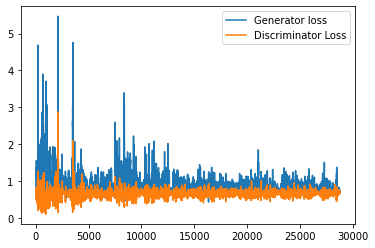

In [238]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [239]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [240]:
latent_space_samples[:10]

tensor([[0.7110, 0.6532, 0.3414, 0.4929, 0.1090, 0.3735, 0.9679, 0.1864],
        [0.0497, 0.2547, 0.2286, 0.0471, 0.8481, 0.8750, 0.3879, 0.2977],
        [0.7681, 0.1050, 0.2071, 0.0608, 0.0102, 0.5448, 0.9156, 0.2173],
        [0.3900, 0.8594, 0.5533, 0.6993, 0.6947, 0.9940, 0.1589, 0.5333],
        [0.9915, 0.5208, 0.3079, 0.7188, 0.1941, 0.5582, 0.3663, 0.1283],
        [0.5291, 0.8017, 0.6429, 0.3142, 0.3831, 0.1537, 0.7043, 0.0925],
        [0.0661, 0.0767, 0.7691, 0.6505, 0.1399, 0.8716, 0.0371, 0.4837],
        [0.6683, 0.2074, 0.6546, 0.8890, 0.8198, 0.1598, 0.3190, 0.8289],
        [0.0825, 0.2415, 0.0904, 0.5200, 0.6816, 0.5385, 0.8794, 0.6059],
        [0.8327, 0.2753, 0.3404, 0.2251, 0.9284, 0.2173, 0.7480, 0.7541]])

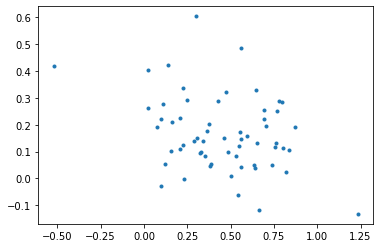

In [241]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [242]:
from scipy.spatial import distance

In [243]:
float_x = real_samples[0].double()

In [244]:
float_x = list(float_x.numpy())

In [245]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.027


In [246]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [247]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [248]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [249]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [250]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [251]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [252]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 2.152


In [253]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [254]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:2304,4:]

In [255]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [256]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [257]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [258]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [259]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:2304,4:]

In [260]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [261]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [262]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [263]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [264]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [265]:
#compare recomendations to test subjects
cost1_name = []
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 63 ; index: Piensan ; cos sim: [[0.99999294]]
len train data: 63 ; index: Let Her Go ; cos sim: [[0.999987]]
len train data: 63 ; index: Lower ; cos sim: [[1.]]
len train data: 63 ; index: Tumbando el Club (feat. C.R.O., Obiewanshot, Ysy A, Cazzu, Khea, Lucho SSJ, CoqeÃ©in Montana, Marcianos Crew & Duki) - Remix ; cos sim: [[0.99999524]]
len train data: 63 ; index: Shifts Of Light ; cos sim: [[0.99999534]]
len train data: 63 ; index: Molly ; cos sim: [[0.9999965]]
len train data: 63 ; index: Paradise ; cos sim: [[0.99999364]]
len train data: 63 ; index: Let Her Go ; cos sim: [[0.9999947]]
len train data: 63 ; index: Piensan ; cos sim: [[0.99999745]]
len train data: 63 ; index: Enemy Turf ; cos sim: [[0.99998432]]


In [266]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [267]:
euc_rec3.shape

(62, 9)

In [268]:
euct1_name = []
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 62 ; index: BFAM - Original Mix ; euclid sim: 2.3240379967633955
len train data: 62 ; index: Moon ; euclid sim: 2.263029352438881
len train data: 62 ; index: Nudies ; euclid sim: 3.6536519456565646
len train data: 62 ; index: Want Beef? ; euclid sim: 2.246405764771809
len train data: 62 ; index: Algo Rhythm ; euclid sim: 1.3977144475684622
len train data: 62 ; index: It's Been Awhile ; euclid sim: 0.9548193243226628
len train data: 62 ; index: BFAM - Original Mix ; euclid sim: 1.0628740359986204
len train data: 62 ; index: Alarm ; euclid sim: 1.421352778165919
len train data: 62 ; index: 22 ; euclid sim: 3.6111516147760963
len train data: 62 ; index: Je m'en vais ; euclid sim: 1.0490313293701004


In [269]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [270]:
#compare recomendations to test subjects
cost2_name = []
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 63 ; index: California ; cos sim: [[0.99999116]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99999657]]
len train data: 63 ; index: I Adore Mi Amor ; cos sim: [[1.]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99999447]]
len train data: 63 ; index: Don't Kill My High (feat. Wiz Khalifa & Social House) ; cos sim: [[0.99998197]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99998357]]
len train data: 63 ; index: Broccoli ; cos sim: [[0.9999895]]
len train data: 63 ; index: Paradise ; cos sim: [[0.99998583]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99999808]]
len train data: 63 ; index: Don't Kill My High (feat. Wiz Khalifa & Social House) ; cos sim: [[0.9999596]]
len train data: 63 ; index: At The Club ; cos sim: [[0.99999003]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99999719]]
len train data: 6

In [271]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [272]:
euct2_name =[]
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 62 ; index: NEVER ; euclid sim: 1.1624878709044624
len train data: 62 ; index: Wait For You (feat. Maia Wright) ; euclid sim: 0.45360478392539133
len train data: 62 ; index: Into You (feat. Fabolous) ; euclid sim: 1.3490110637055517
len train data: 62 ; index: It's Been Awhile ; euclid sim: 2.5097155277242074
len train data: 62 ; index: Front Seat ; euclid sim: 3.291738811023752
len train data: 62 ; index: Je m'en vais ; euclid sim: 1.4273407611358961
len train data: 62 ; index: Before You Go ; euclid sim: 2.4189794831705407
len train data: 62 ; index: Before You Go ; euclid sim: 1.4787820338373063
len train data: 62 ; index: Wait For You (feat. Maia Wright) ; euclid sim: 0.7984944708637599
len train data: 62 ; index: California Love - Original Version (Explicit) ; euclid sim: 1.0938691923625965
len train data: 62 ; index: NEVER ; euclid sim: 1.5425898453250677
len train data: 62 ; index: Rendezvous ; euclid sim: 0.8993125485614017
len train data: 62 ; index: Always Gon

In [273]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [274]:
#compare recomendations to test subjects
cost3_name = []
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 63 ; index: Molly ; cos sim: [[0.99998594]]
len train data: 63 ; index: La Bicicleta ; cos sim: [[0.99999727]]
len train data: 63 ; index: Control ; cos sim: [[0.99999376]]
len train data: 63 ; index: Summer Song ; cos sim: [[0.99998837]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99998945]]
len train data: 63 ; index: Shifts Of Light ; cos sim: [[0.99999584]]
len train data: 63 ; index: Still Got Me (feat. Jocelyn Bowman) ; cos sim: [[0.99999296]]
len train data: 63 ; index: Bennie And The Jets - Remastered 2014 ; cos sim: [[0.99997388]]
len train data: 63 ; index: California ; cos sim: [[0.999971]]
len train data: 63 ; index: Blinding Lights ; cos sim: [[0.99999664]]
len train data: 63 ; index: California ; cos sim: [[0.99998469]]


In [275]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [276]:
euct3_name = []
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 62 ; index: Grow Up - Martin Jensen Remix ; euclid sim: 0.445663931679466
len train data: 62 ; index: Algo Rhythm ; euclid sim: 1.1403018735149077
len train data: 62 ; index: Sway - Chainsmokers Remix ; euclid sim: 0.0
len train data: 62 ; index: Billion ; euclid sim: 2.934463041857091
len train data: 62 ; index: Kayleigh - 2017 Remaster ; euclid sim: 1.5653104356644476
len train data: 62 ; index: 22 ; euclid sim: 4.576022710269249
len train data: 62 ; index: Je m'en vais ; euclid sim: 2.274603846826963
len train data: 62 ; index: Blessings ; euclid sim: 1.396004917613115
len train data: 62 ; index: Want Beef? ; euclid sim: 3.639458132744489
len train data: 62 ; index: Los Feliz ; euclid sim: 2.039058150225246
len train data: 62 ; index: Crime Wave ; euclid sim: 1.6885977277519264


In [277]:
rec_coseT1.extend(rec_coseT2)

In [278]:
rec_coseT1.extend(rec_coseT3)

In [279]:
print(rec_coseT1)

[0.9999929428711826, 0.9999869982023877, 1.0, 0.9999952371761154, 0.9999953388367763, 0.9999965037946112, 0.9999936415664861, 0.9999947039448756, 0.9999974527504084, 0.9999843186683912, 0.9999911562051341, 0.999996568973574, 0.9999999999999999, 0.9999944703515424, 0.9999819652360916, 0.9999835693872371, 0.9999894998494051, 0.9999858330464003, 0.9999980841902939, 0.9999596014218345, 0.9999900256574256, 0.9999971869652006, 0.9999940555560881, 0.9999857243261181, 0.9999961014923275, 0.9999830328282334, 0.9999949665758084, 0.9999859351853936, 0.9999972749058328, 0.9999937555927387, 0.9999883732541607, 0.9999894480679602, 0.9999958434635062, 0.9999929613980804, 0.9999738830953411, 0.9999710030552, 0.999996643582321, 0.9999846883065254]


In [280]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [281]:
print(rec_eucT1)

[2.3240379967633955, 2.263029352438881, 3.6536519456565646, 2.246405764771809, 1.3977144475684622, 0.9548193243226628, 1.0628740359986204, 1.421352778165919, 3.6111516147760963, 1.0490313293701004, 1.1624878709044624, 0.45360478392539133, 1.3490110637055517, 2.5097155277242074, 3.291738811023752, 1.4273407611358961, 2.4189794831705407, 1.4787820338373063, 0.7984944708637599, 1.0938691923625965, 1.5425898453250677, 0.8993125485614017, 2.7170513521094977, 1.9589469135226796, 18.14466769914509, 1.2713710276705203, 2.2102564941653267, 0.445663931679466, 1.1403018735149077, 0.0, 2.934463041857091, 1.5653104356644476, 4.576022710269249, 2.274603846826963, 1.396004917613115, 3.639458132744489, 2.039058150225246, 1.6885977277519264]


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0595) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

In [282]:
df1_rec =  df4[df4['track_name'].isin(euct1_name)]
df2_rec =  df4[df4['track_name'].isin(euct2_name)]
df3_rec =  df4[df4['track_name'].isin(euct3_name)]
dfc1_rec =  df4[df4['track_name'].isin(cost1_name)]
dfc2_rec =  df4[df4['track_name'].isin(cost2_name)]
dfc3_rec =  df4[df4['track_name'].isin(cost3_name)]

In [283]:
testing37 = df1_rec.iloc[:,[0,2]]
testing37_dict = dict(zip(testing37.track_name, testing37.track_artist))
eucdf1 = pd.DataFrame(euct1_name)
eucdf1['artist'] = eucdf1[0].map(testing37_dict)
eucdf1

,0,artist
0,BFAM - Original Mix,Julian Jordan
1,Moon,Kid Francescoli
2,Nudies,24hrs
3,Want Beef?,YSN Flow
4,Algo Rhythm,One Sentence. Supervisor
5,It's Been Awhile,Staind
6,BFAM - Original Mix,Julian Jordan
7,Alarm,Anne-Marie
8,22,TINI
9,Je m'en vais,Cali


In [284]:
testing38 = df2_rec.iloc[:,[0,2]]
testing38_dict = dict(zip(testing38.track_name, testing38.track_artist))
eucdf2 = pd.DataFrame(euct2_name)
eucdf2['artist'] = eucdf2[0].map(testing38_dict)
eucdf2

,0,artist
0,NEVER,JID
1,Wait For You (feat. Maia Wright),Mike Williams
2,Into You (feat. Fabolous),Tamia
3,It's Been Awhile,Staind
4,Front Seat,Next Town Down
5,Je m'en vais,Cali
6,Before You Go,Lewis Capaldi
7,Before You Go,Lewis Capaldi
8,Wait For You (feat. Maia Wright),Mike Williams
9,California Love - Original Version (Explicit),2Pac


In [285]:
testing39 = df3_rec.iloc[:,[0,2]]
testing39_dict = dict(zip(testing39.track_name, testing39.track_artist))
eucdf3 = pd.DataFrame(euct3_name)
eucdf3['artist'] = eucdf3[0].map(testing39_dict)
eucdf3

,0,artist
0,Grow Up - Martin Jensen Remix,Olly Murs
1,Algo Rhythm,One Sentence. Supervisor
2,Sway - Chainsmokers Remix,Anna of the North
3,Billion,Emilia
4,Kayleigh - 2017 Remaster,Marillion
5,22,TINI
6,Je m'en vais,Cali
7,Blessings,Tropixx
8,Want Beef?,YSN Flow
9,Los Feliz,Search For Atlantis


In [286]:
testing40 = dfc1_rec.iloc[:,[0,2]]
testing40_dict = dict(zip(testing40.track_name, testing40.track_artist))
cosdf1 = pd.DataFrame(cost1_name)
cosdf1['artist'] = cosdf1[0].map(testing40_dict)
cosdf1

,0,artist
0,Piensan,Myke Towers
1,Let Her Go,6LACK
2,Lower,TENDER
3,"Tumbando el Club (feat. C.R.O., Obiewanshot, Y...",Neo Pistea
4,Shifts Of Light,Avery Young
5,Molly,Tyga
6,Paradise,Coldplay
7,Let Her Go,6LACK
8,Piensan,Myke Towers
9,Enemy Turf,Juvenile


In [287]:
testing41 = dfc2_rec.iloc[:,[0,2]]
testing41_dict = dict(zip(testing41.track_name, testing41.track_artist))
cosdf2 = pd.DataFrame(cost2_name)
cosdf2['artist'] = cosdf2[0].map(testing41_dict)
cosdf2

,0,artist
0,California,Delinquent Habits
1,Still Got Me (feat. Jocelyn Bowman),GAWVI
2,I Adore Mi Amor,Color Me Badd
3,Still Got Me (feat. Jocelyn Bowman),GAWVI
4,Don't Kill My High (feat. Wiz Khalifa & Social...,Lost Kings
5,Still Got Me (feat. Jocelyn Bowman),GAWVI
6,Broccoli,DRAM
7,Paradise,Coldplay
8,Still Got Me (feat. Jocelyn Bowman),GAWVI
9,Don't Kill My High (feat. Wiz Khalifa & Social...,Lost Kings


In [288]:
testing42 = dfc3_rec.iloc[:,[0,2]]
testing42_dict = dict(zip(testing42.track_name, testing42.track_artist))
cosdf3 = pd.DataFrame(cost3_name)
cosdf3['artist'] = cosdf3[0].map(testing42_dict)
cosdf3

,0,artist
0,Molly,Tyga
1,La Bicicleta,Carlos Vives
2,Control,Emmit Fenn
3,Summer Song,The Cranberries
4,Still Got Me (feat. Jocelyn Bowman),GAWVI
5,Shifts Of Light,Avery Young
6,Still Got Me (feat. Jocelyn Bowman),GAWVI
7,Bennie And The Jets - Remastered 2014,Elton John
8,California,Delinquent Habits
9,Blinding Lights,The Weeknd


In [293]:
NMrec_coseT1 = [0.9999882565562278, 0.9999979657721999, 0.9999923315617796, 0.9999746647186672, 0.9999901937205865, 0.9999706879428859, 0.9999924474371015, 0.9999880066636926, 0.9999949362641557, 0.9999965341681638, 0.9999936206901414, 0.9999965721246039, 0.9999959190435552, 0.9999946435235009, 0.9999952057741548, 0.9999872392137804, 0.9999859006190891, 0.9999901625784263, 0.9999811356355937, 1.0000000000000002, 0.9999874616201471, 0.9999951986407136, 0.999976208736606, 0.9999935849885221, 0.999985199829622, 0.9999697845137847, 1.0000000000000002, 0.9999880504097526, 0.9999833384467354, 0.9999986641236054, 0.9999817025765818, 0.9999898416831324, 0.9999933611849076, 0.99996833069327, 0.9999600371403314, 0.9999999999999998, 1.0000000000000002, 0.9999863089756407]

In [290]:
EMrec_eucT1 = [2.407115927827317, 2.1227171705387295, 4.428556579981792, 2.197995593739894, 1.133499480833143, 1.250204570333929, 2.2072286900092637, 0.0, 4.4912641608460175, 1.4601177966224683, 1.8295074798865971, 1.939226915350311, 1.084095862919881, 1.116991413594705, 4.709134523475078, 2.035558851642454, 1.1725702367186985, 0.6141327507957888, 2.8147316651397443, 1.7313928641414678, 1.0622312904918578, 1.1790049733536883, 4.563023780345656, 2.8010729801274317, 20.15725075282835, 6.859939086548072, 0.9709992636601236, 1.454692714789706, 3.1254399877535644, 2.2184701844289014, 3.6878526751383274, 4.126718822454468, 7.898767420458693, 1.6347041395558488, 2.245660591006576, 2.2062962380650535, 5.008351012759326, 2.4266590922009037]

In [291]:
from scipy import stats
#stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)
stats.ttest_rel(rec_eucT1, EMrec_eucT1)

Ttest_relResult(statistic=-3.0820926033275975, pvalue=0.0038698273448219945)

In [292]:
import scipy.stats as stats
#stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)
stats.ttest_rel(rec_coseT1, b=NMrec_coseT1)

Ttest_relResult(statistic=0.817791931774762, pvalue=0.418711426073046)